In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [3]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.4554 - accuracy: 0.7655 - val_loss: 0.3374 - val_accuracy: 0.8492
Epoch 2/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2931 - accuracy: 0.8779 - val_loss: 0.3287 - val_accuracy: 0.8562
Epoch 3/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2478 - accuracy: 0.9002 - val_loss: 0.3295 - val_accuracy: 0.8570
Epoch 4/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.2119 - accuracy: 0.9165 - val_loss: 0.3441 - val_accuracy: 0.8558
Epoch 5/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.1779 - accuracy: 0.9332 - val_loss: 0.3494 - val_accuracy: 0.8549


In [6]:
print(model.evaluate(x_test, y_test))

25000/25000 [==============================] - 11s 445us/sample - loss: 0.3494 - accuracy: 0.8549
[0.3494022795009613, 0.85492]


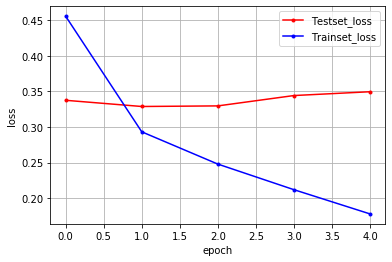

In [7]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()